In [1]:
import pandas as pd
import numpy as np

In [28]:
covid=pd.read_csv(r"E:\Practical Machine Learning\Day 2\dataset\covid_toy.csv")
covid

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


In [3]:
covid.isna().any()

age          False
gender       False
fever         True
cough        False
city         False
has_covid    False
dtype: bool

In [4]:
covid['fever'].mean()

100.84444444444445

In [5]:
covid['fever'].median()

101.0

In [6]:
co =covid['fever']
co

0     103.0
1     100.0
2     101.0
3      98.0
4     101.0
      ...  
95    104.0
96    101.0
97    101.0
98     98.0
99     98.0
Name: fever, Length: 100, dtype: float64

C:\Users\KARTIK\AppData\Local\Temp\ipykernel_20976\659252477.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(co)


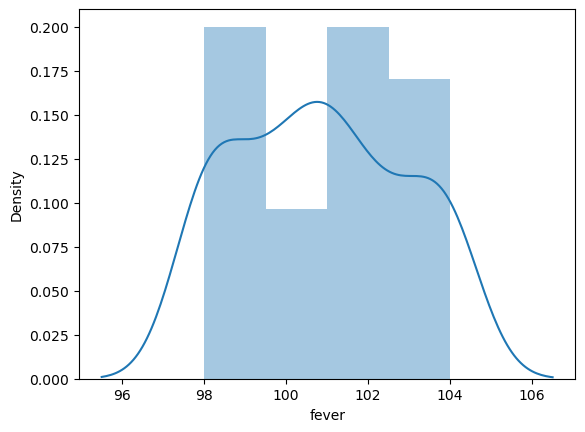

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.distplot(co)
plt.show()

In [8]:
x=covid.iloc[:,:-1]
y=covid.iloc[:,-1]

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=1)


In [10]:
x_train.shape

(80, 5)

In [11]:
x_train

,age,gender,fever,cough,city
2,42,Male,101.0,Mild,Delhi
73,34,Male,98.0,Strong,Kolkata
97,20,Female,101.0,Mild,Bangalore
62,56,Female,104.0,Strong,Bangalore
19,42,Female,NaN,Strong,Bangalore
...,...,...,...,...,...
75,5,Male,102.0,Mild,Kolkata
9,64,Female,101.0,Mild,Delhi
72,83,Female,101.0,Mild,Kolkata
12,25,Female,99.0,Strong,Kolkata


In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imputer = SimpleImputer(missing_values=np.nan , strategy='mean')
x_train.iloc[:,2:3] =  imputer.fit_transform(x_train.iloc[:,2:3])
x_train.info()
x_train.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 2 to 37
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     80 non-null     int64  
 1   gender  80 non-null     object 
 2   fever   80 non-null     float64
 3   cough   80 non-null     object 
 4   city    80 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.8+ KB


(80, 5)

In [14]:
#imputer = SimpleImputer(missing_values=np.nan , strategy='mean')
#g = x_train.iloc[:,2:3].values
#x_train.iloc[:,2:3] =  imputer.fit_transform(g)
#x_train.info()

In [15]:
x_train['cough'].unique()

array(['Mild', 'Strong'], dtype=object)

In [16]:
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder (categories=[['Mild','Strong']])
data_ord = x_train.iloc[:,3:4]
model=oe.fit_transform(data_ord)


In [20]:
model


array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [18]:
#from sklearn.preprocessing import OneHotEncoder
#one_hot_encoder =  OneHotEncoder(drop = 'first' , sparse=False)
#x=x_train.iloc[:,-1].values
#x = one_hot_encoder.fit_transform(x.reshape(-1,1))

#x1= x_train.iloc[:,:1].values
#x1 = one_hot_encoder.fit_transform(x1.reshape(-1,1))


In [30]:
x_train['city'].unique()

array(['Delhi', 'Kolkata', 'Bangalore', 'Mumbai'], dtype=object)

In [31]:
x_train['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct= ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'),[-1]) , ('encoder1', OneHotEncoder(drop='first'),[1])], remainder='passthrough')
X = np.array(ct.fit_transform(x_train))
X


array([[1.0, 0.0, 0.0, 1.0, 42, 101.0, 'Mild'],
       [0.0, 1.0, 0.0, 1.0, 34, 98.0, 'Strong'],
       [0.0, 0.0, 0.0, 0.0, 20, 101.0, 'Mild'],
       [0.0, 0.0, 0.0, 0.0, 56, 104.0, 'Strong'],
       [0.0, 0.0, 0.0, 0.0, 42, nan, 'Strong'],
       [0.0, 0.0, 0.0, 0.0, 82, 102.0, 'Strong'],
       [0.0, 1.0, 0.0, 1.0, 79, nan, 'Strong'],
       [1.0, 0.0, 0.0, 0.0, 33, 102.0, 'Strong'],
       [0.0, 0.0, 1.0, 0.0, 19, 101.0, 'Mild'],
       [1.0, 0.0, 0.0, 0.0, 49, 101.0, 'Mild'],
       [0.0, 0.0, 0.0, 1.0, 65, 99.0, 'Mild'],
       [0.0, 1.0, 0.0, 0.0, 10, 98.0, 'Strong'],
       [0.0, 0.0, 1.0, 0.0, 60, 99.0, 'Mild'],
       [0.0, 0.0, 0.0, 0.0, 12, 104.0, 'Mild'],
       [0.0, 1.0, 0.0, 0.0, 5, 100.0, 'Mild'],
       [1.0, 0.0, 0.0, 0.0, 49, 102.0, 'Mild'],
       [0.0, 0.0, 0.0, 1.0, 66, 99.0, 'Strong'],
       [0.0, 1.0, 0.0, 0.0, 6, 104.0, 'Mild'],
       [1.0, 0.0, 0.0, 0.0, 80, 98.0, 'Mild'],
       [0.0, 0.0, 1.0, 1.0, 74, 102.0, 'Mild'],
       [0.0, 0.0, 0.0, 1.0, 25, 104.

In [33]:
x_train

,age,gender,fever,cough,city
2,42,Male,101.0,Mild,Delhi
73,34,Male,98.0,Strong,Kolkata
97,20,Female,101.0,Mild,Bangalore
62,56,Female,104.0,Strong,Bangalore
19,42,Female,NaN,Strong,Bangalore
...,...,...,...,...,...
75,5,Male,102.0,Mild,Kolkata
9,64,Female,101.0,Mild,Delhi
72,83,Female,101.0,Mild,Kolkata
12,25,Female,99.0,Strong,Kolkata
